In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

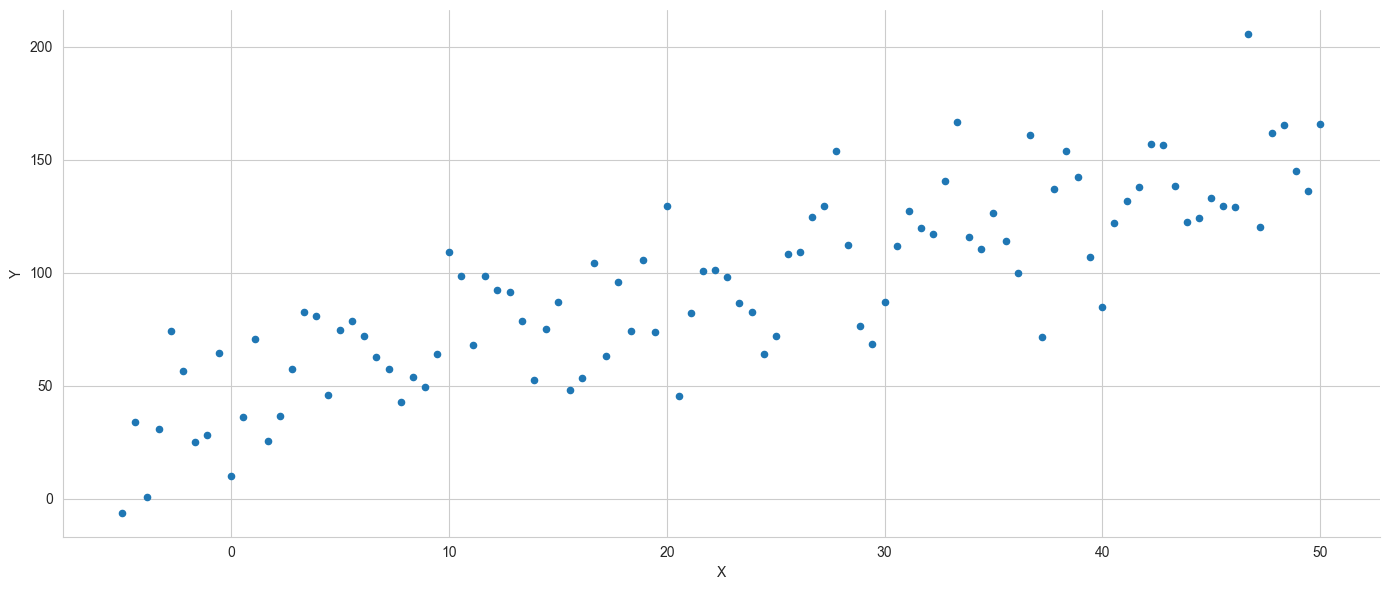

In [8]:
x = np.linspace(-5, 50, 100)
y = 50 + 2*x + np.random.normal(0,20, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14,6))
sns.despine()
plt.tight_layout()

In [9]:
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     225.7
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           3.58e-27
Time:                        15:57:10   Log-Likelihood:                -454.36
No. Observations:                 100   AIC:                             912.7
Df Residuals:                      98   BIC:                             917.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.5243      3.960     11.496      0.0

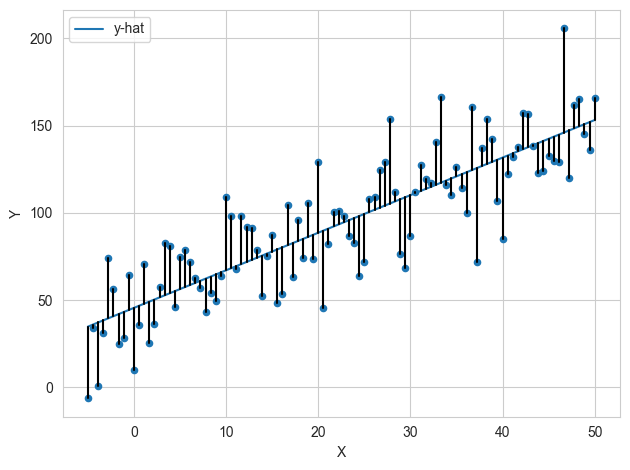

In [19]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y')
data.plot.line(x='X', y='y-hat', ax=ax)
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']),'k-')
plt.tight_layout()

## Multiple regression

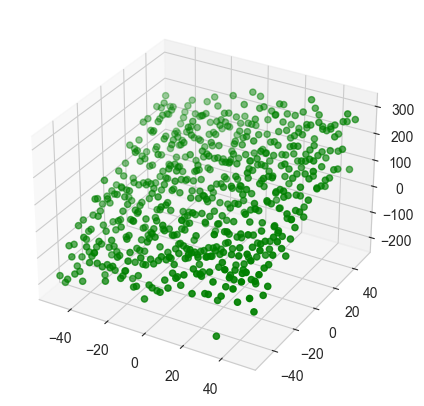

In [40]:
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3* data.X_2 + np.random.normal(0,50, size=size**2)

three_d = plt.figure(figsize=(15,5)).gca(projection='3d')
three_d.scatter(data.X_1, data.X_2, data.Y, c='g')

In [65]:
X = data[['X_1', 'X_2']]
y = data.Y

In [45]:
X_ols = sm.add_constant(X)

In [52]:
model = sm.OLS(y, X_ols).fit()

In [56]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1093.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          2.59e-204
Time:                        17:36:37   Log-Likelihood:                -3313.7
No. Observations:                 625   AIC:                             6633.
Df Residuals:                     622   BIC:                             6647.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.3291      1.948     25.843      0.0

We can apply stochastic gradient descent to the previous synthetic dataset. But we have to standardize the data because the gradient is sensitive to the scale

In [66]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

In [67]:
sgd = SGDRegressor(loss='squared_loss',
                   fit_intercept=True,
                   shuffle=True,
                   random_state=42,
                   learning_rate='invscaling',
                   eta0=0.01,
                   power_t=0.25)

In [68]:
sgd.fit(X=X_, y=y)

SGDRegressor(random_state=42)

In [92]:
coeffs = (sgd.coef_ * scaler.scale_) + scaler.mean_

In [93]:
pd.Series(coeffs, index=X.columns)

X_1     851.86
X_2   2,598.99
dtype: float64

In [94]:
resids = pd.DataFrame({'sgd': y-sgd.predict(X_),
                      'ols': y-model.predict(X_ols)})

In [96]:
resids.pow(2).sum().div(len(y)).pow(.5)

sgd   48.57
ols   48.57
dtype: float64

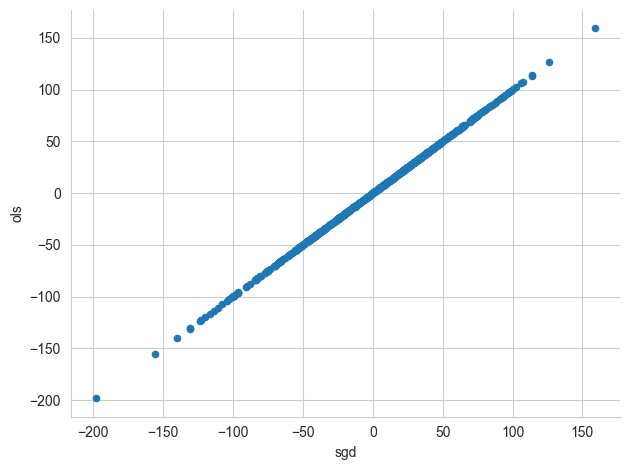

In [97]:
resids.plot.scatter(x='sgd', y='ols')
sns.despine()
plt.tight_layout();

In [98]:
y

0     -177.45
1     -219.59
2      -94.11
3     -104.40
4      -48.11
        ...  
620    133.82
621    193.20
622    309.50
623     89.53
624    262.08
Name: Y, Length: 625, dtype: float64